# Clustering

In [1]:
# Packages we might not have
try:
    import sklearn
except:
    %pip install scikit-learn

In [2]:
import pandas as pd
import sklearn.cluster
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [3]:
iris = pd.read_csv('../data/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.drop(columns=['species'], inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
kmeans = sklearn.cluster.KMeans(n_clusters=3)
kmeans.fit(iris)
kmeans

KMeans(n_clusters=3)

In [6]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [7]:
irisWithClusters = iris.copy()
irisWithClusters['cluster'] = kmeans.labels_
irisWithClusters.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


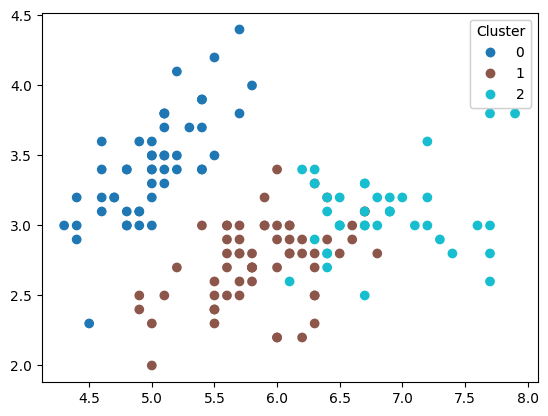

In [8]:
fig, ax = plt.subplots()
scatter = plt.scatter(irisWithClusters['sepal_length'], irisWithClusters['sepal_width'], c=irisWithClusters['cluster'], cmap='tab10')
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Cluster")
ax.add_artist(legend)

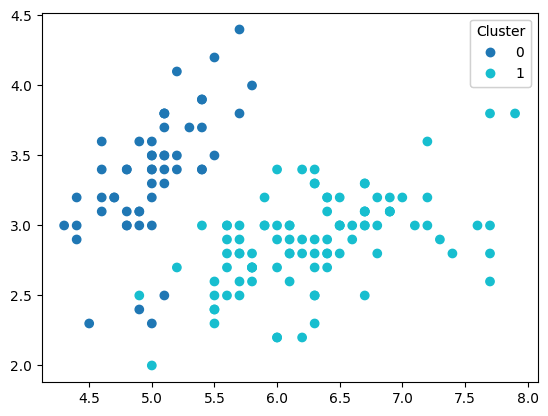

In [9]:
kmeans = sklearn.cluster.KMeans(n_clusters=2)
kmeans.fit(iris)
irisWithClusters = iris.copy()
irisWithClusters['cluster'] = kmeans.labels_
irisWithClusters.head()
fig, ax = plt.subplots()
scatter = plt.scatter(irisWithClusters['sepal_length'], irisWithClusters['sepal_width'], c=irisWithClusters['cluster'], cmap='tab10')
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Cluster")
ax.add_artist(legend)

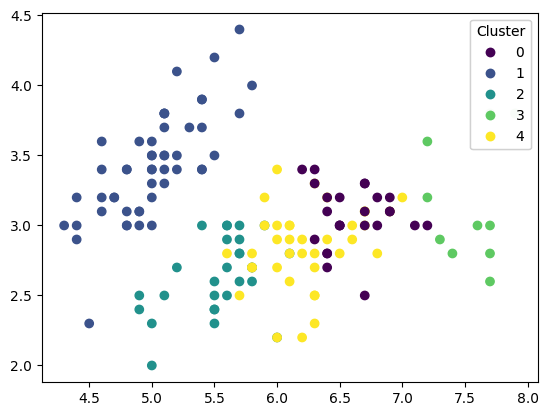

In [10]:
kmeans = sklearn.cluster.KMeans(n_clusters=5)
kmeans.fit(iris)
irisWithClusters = iris.copy()
irisWithClusters['cluster'] = kmeans.labels_
irisWithClusters.head()
fig, ax = plt.subplots()
scatter = plt.scatter(irisWithClusters['sepal_length'], irisWithClusters['sepal_width'], c=irisWithClusters['cluster']) #, cmap='tab10')
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Cluster")
ax.add_artist(legend)

# Find k

Text(0, 0.5, 'MSE')

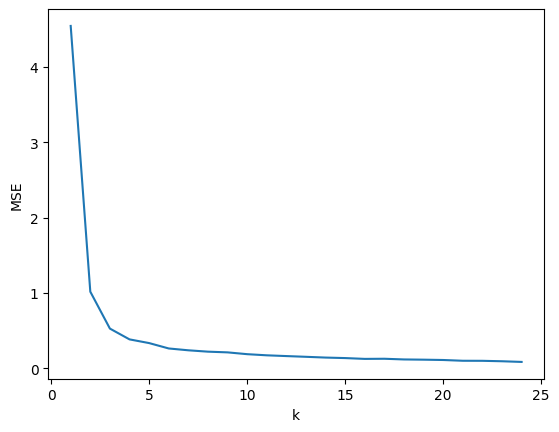

In [13]:
numClusters = []
ks = []
for num in range(1, 25):
    ks.append(num)
    numClusters.append(sklearn.cluster.KMeans(n_clusters=num).fit(iris).inertia_/len(iris))
plt.plot(ks, numClusters)
plt.xlabel('k')
plt.ylabel('MSE')


# Hierarchical clustering

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

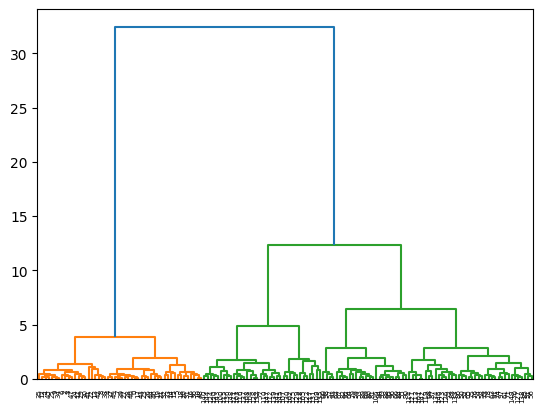

In [16]:
links = linkage(iris, 'ward')
dn = dendrogram(links)